### Configurate Session


In [1]:
%load_ext autoreload

import os
import sys

project_root = "C:/Users/vasco/repos/Natural-Language"
if project_root not in sys.path:
    sys.path.append(project_root)
os.chdir(project_root)

print("Current working directory:", os.getcwd())

Current working directory: C:\Users\vasco\repos\Natural-Language


### Load Data


In [2]:
%autoreload 2
from src.dataset import read_data

path = "data/raw/train.txt"
columns = ["title", "from", "genre", "director", "description"]

df = read_data(path, columns)
df.head(3)

,title,from,genre,director,description
0,Ela Cheppanu,Telugu,romance,Ramana,Sekhar (Tarun) is a graduate from IIM and work...
1,A Nightmare on Elm Street,American,horror,Samuel Bayer,Kris Fowles (Katie Cassidy) goes to the Spring...
2,American Gothic,American,horror,John Hough,Cynthia is traumatized by the death of her bab...


## EDA


### First Impressions


In [3]:
%autoreload 2
print(df.info())
print("*" * 20)
repeated_titles = df["title"].value_counts()[df["title"].value_counts() > 1].head(5)
print(repeated_titles)
print("*" * 20)
popular_directors = df["director"].value_counts().head(5)
print(popular_directors)
print("*" * 20)
print(df["from"].value_counts().head(5))
print("*" * 20)
print("Number of duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        8041 non-null   object
 1   from         8041 non-null   object
 2   genre        8041 non-null   object
 3   director     8041 non-null   object
 4   description  8041 non-null   object
dtypes: object(5)
memory usage: 314.2+ KB
None
********************
title
Dracula               4
The Crimson Circle    3
Hindle Wakes          3
Romance               3
I Love You            3
Name: count, dtype: int64
********************
director
Unknown            178
Hanna-Barbera       46
Lesley Selander     32
Maurice Elvey       28
Joseph Kane         23
Name: count, dtype: int64
********************
from
American     4050
British      1415
Bollywood     632
Telugu        276
Tamil         261
Name: count, dtype: int64
********************
Number of duplicates: 18


### Drop Duplicates


In [4]:
df[df.duplicated(keep=False)].sort_values("title").head(6)

,title,from,genre,director,description
7102,At Gunpoint,American,western,Alfred L. Werker,"Plainview is a peaceful town, all the better f..."
4053,At Gunpoint,American,western,Alfred L. Werker,"Plainview is a peaceful town, all the better f..."
3121,Black Rock,American,horror,Katie Aselton,Sarah (Kate Bosworth) invites her childhood fr...
4714,Black Rock,American,horror,Katie Aselton,Sarah (Kate Bosworth) invites her childhood fr...
6456,Captain America,American,action,Albert Pyun,"In Fascist Italy in 1936, the government kidna..."
6285,Captain America,American,action,Albert Pyun,"In Fascist Italy in 1936, the government kidna..."


In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Plots


In [6]:
%autoreload 2

from src.plots import (
    plot_movie_data,
    plot_stopword_frequency,
    get_text_statistics,
    plot_histograms,
    plot_boxplots,
    plot_pca_tfidf,
    plot_correlation_matrix,
    plot_pca,
)

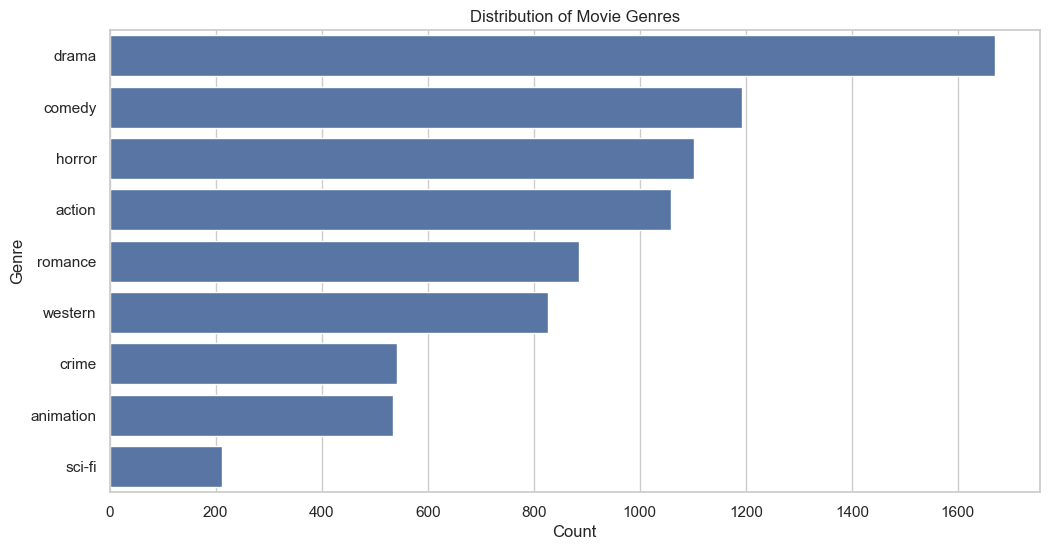

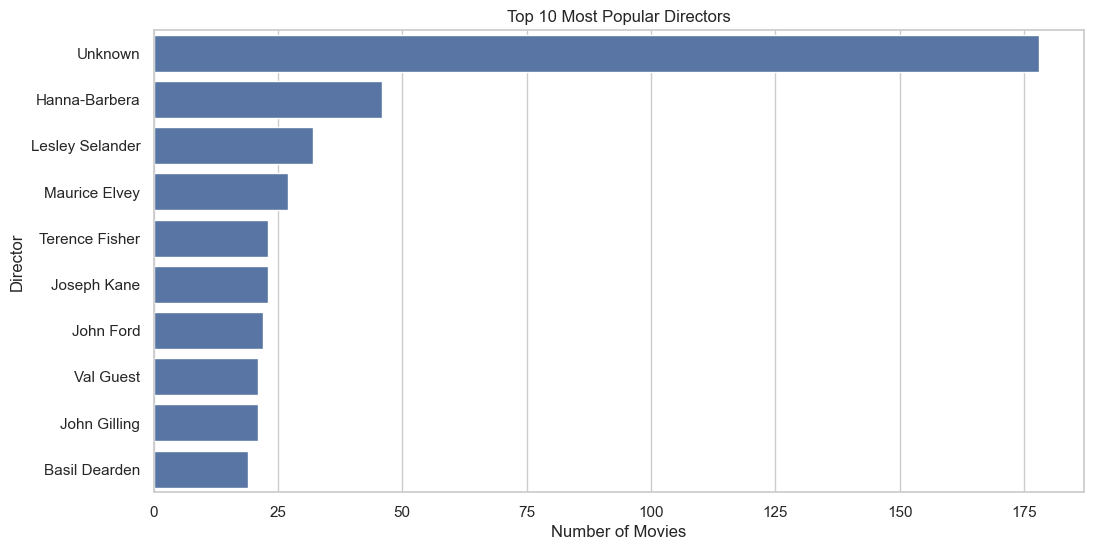

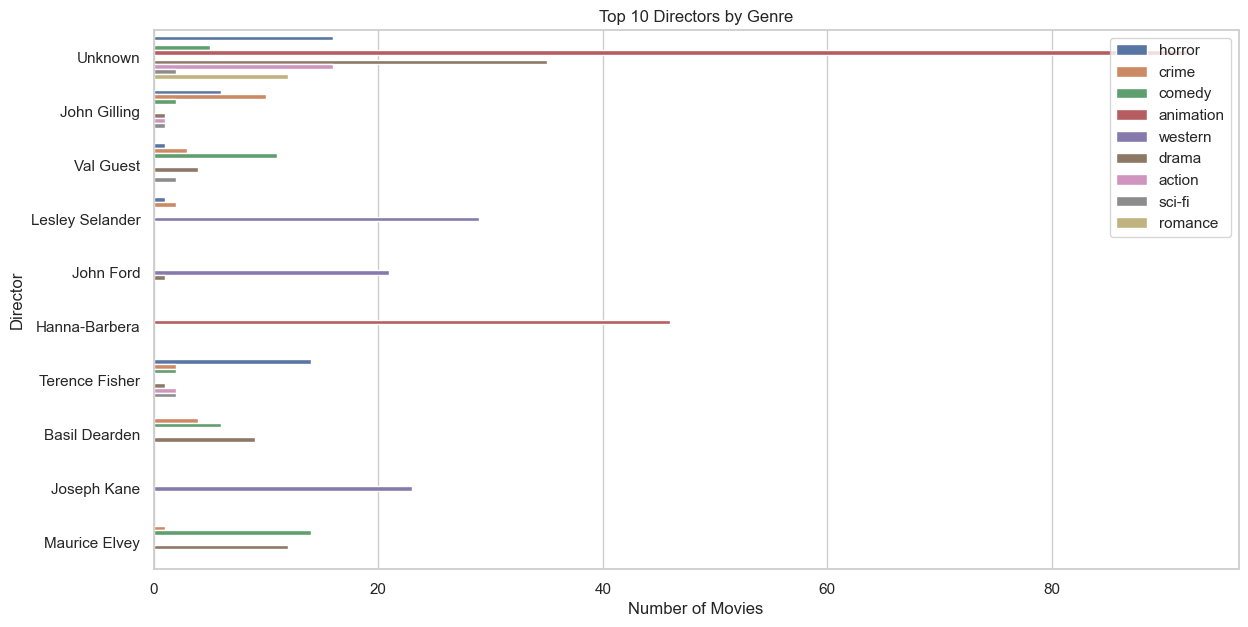

In [7]:
plot_movie_data(df)

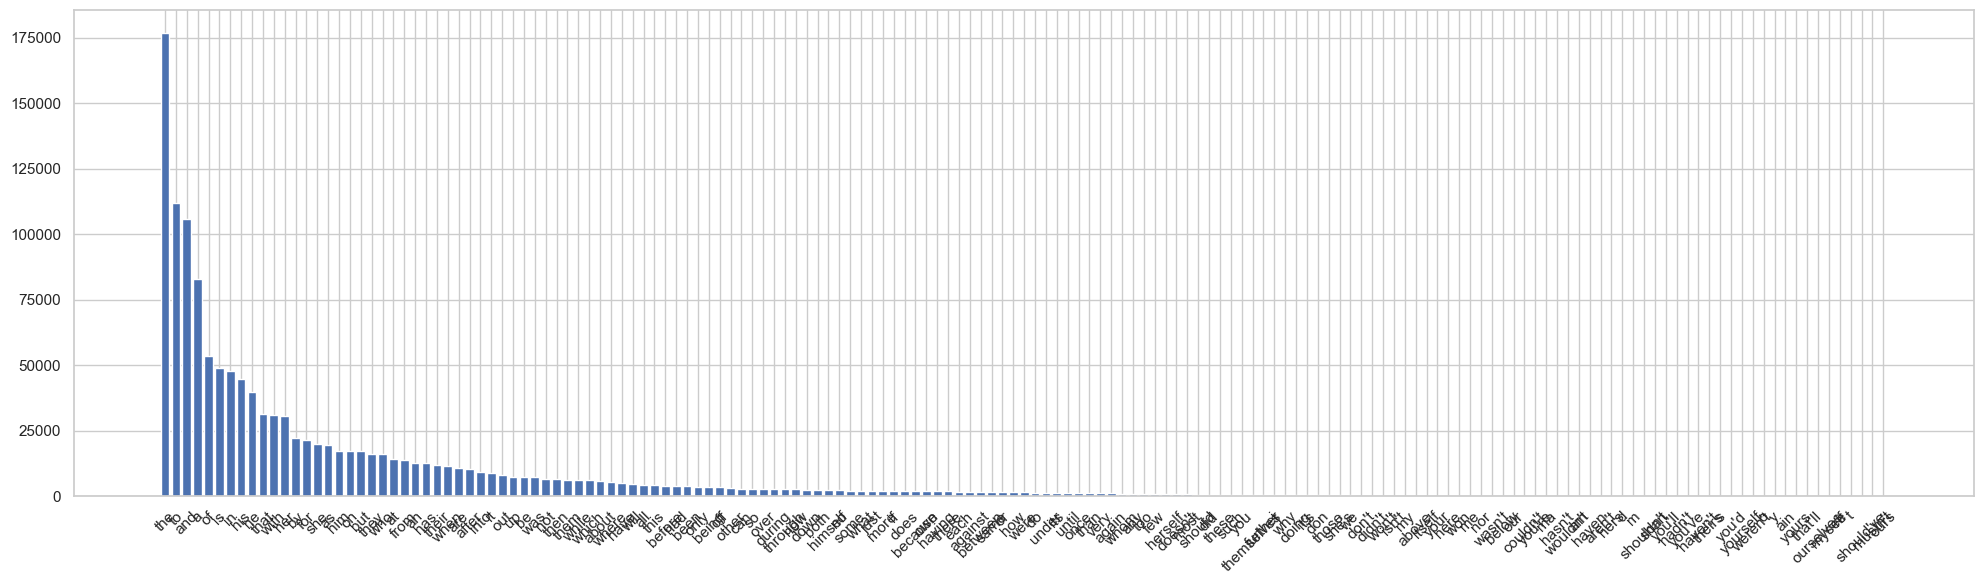

In [8]:
plot_stopword_frequency(df, "description")

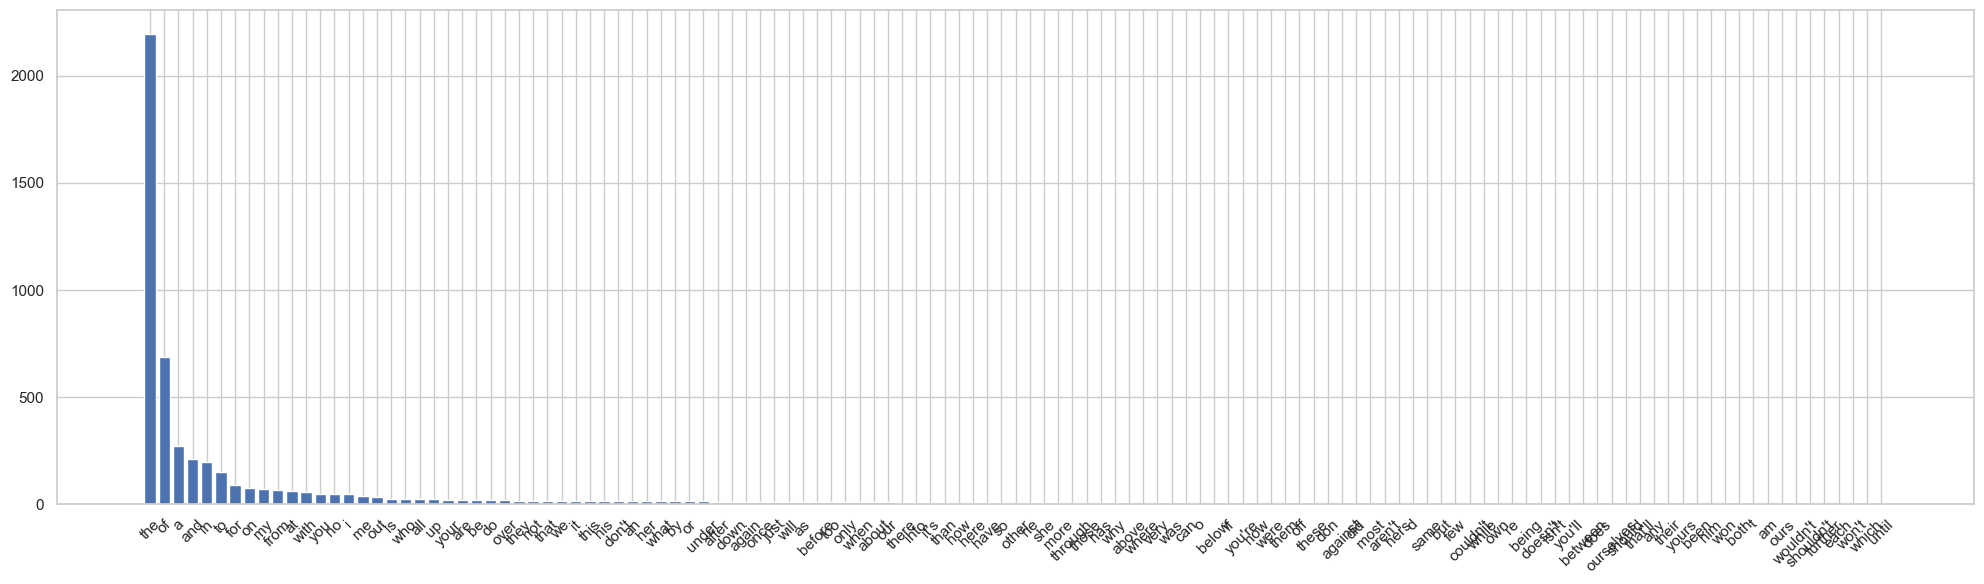

In [9]:
plot_stopword_frequency(df, "title")

In [10]:
stats = get_text_statistics(df, "description")

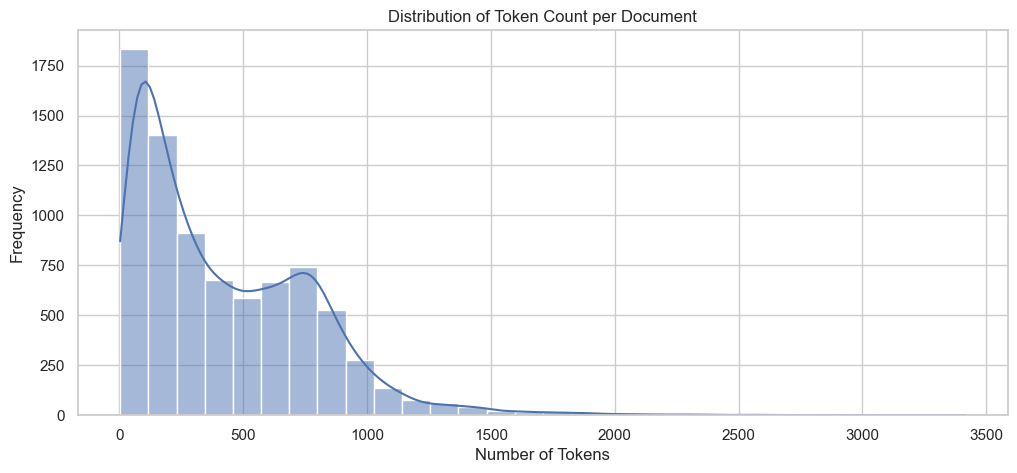

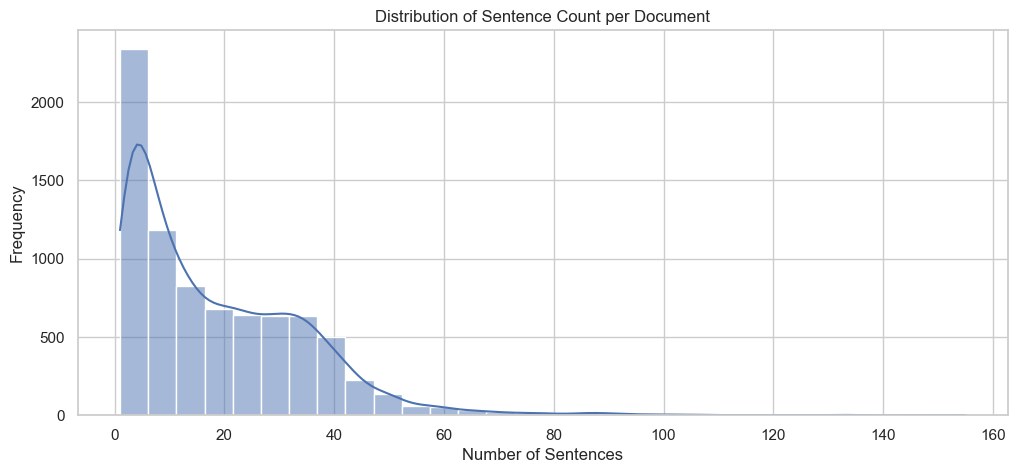

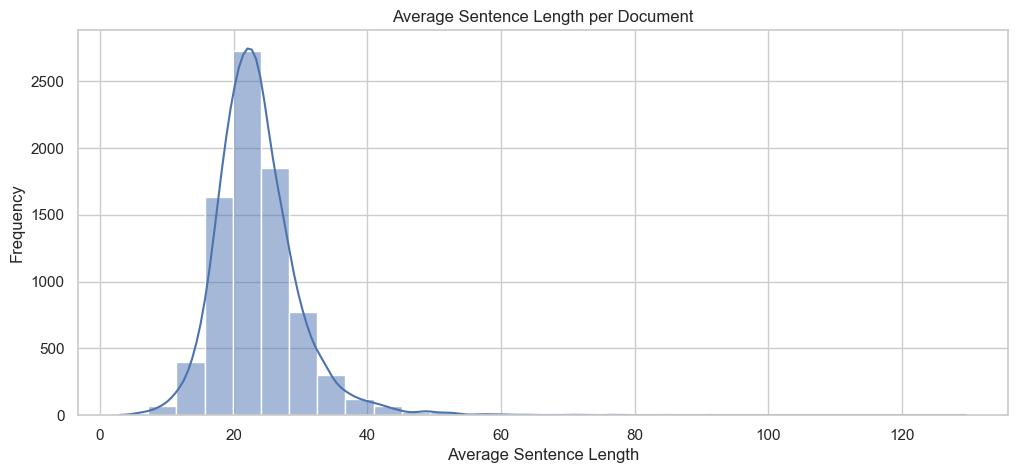

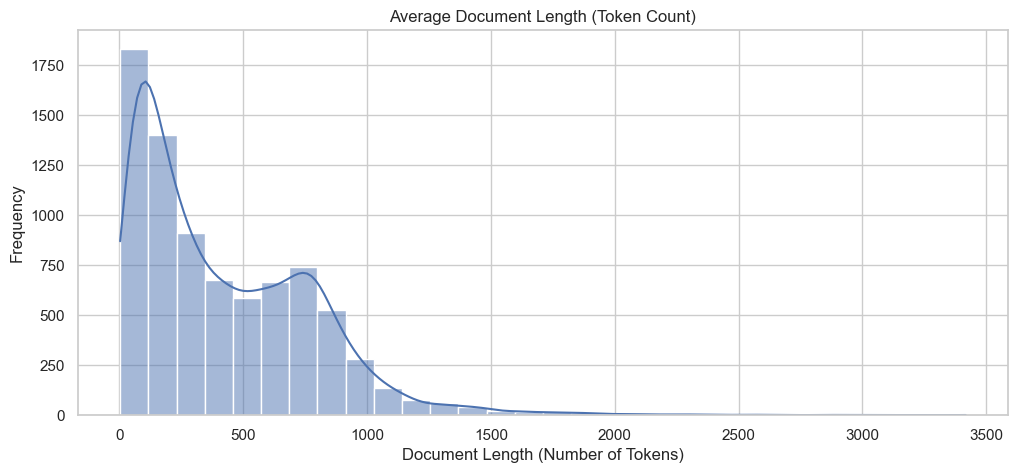

In [11]:
plot_histograms(stats)

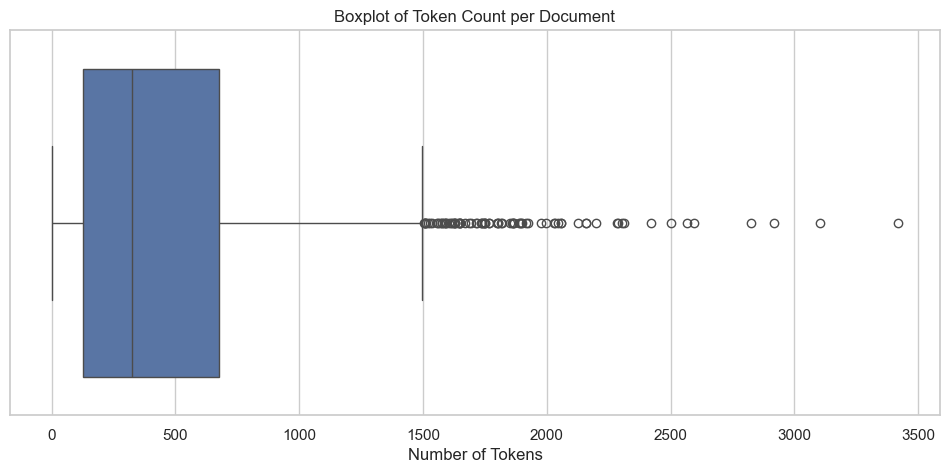

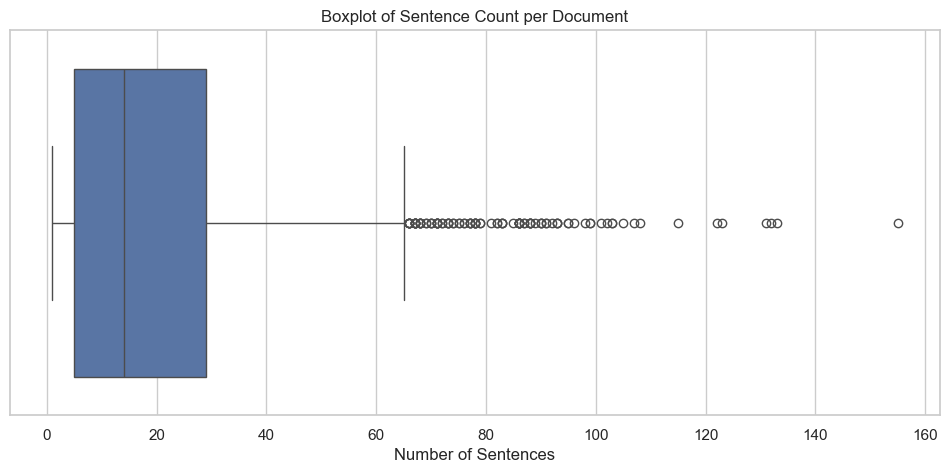

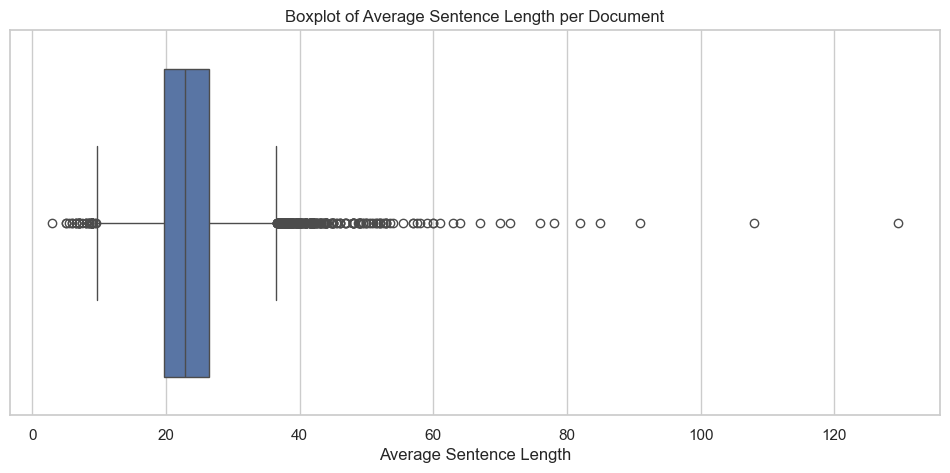

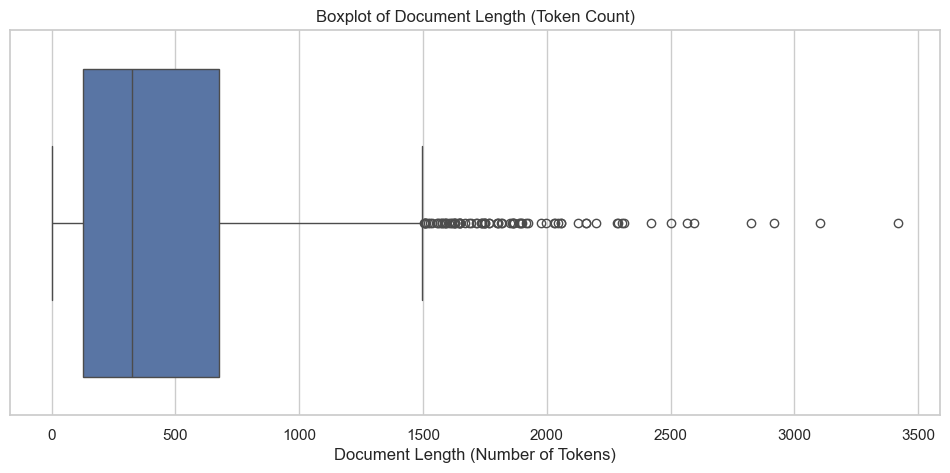

In [12]:
plot_boxplots(stats)

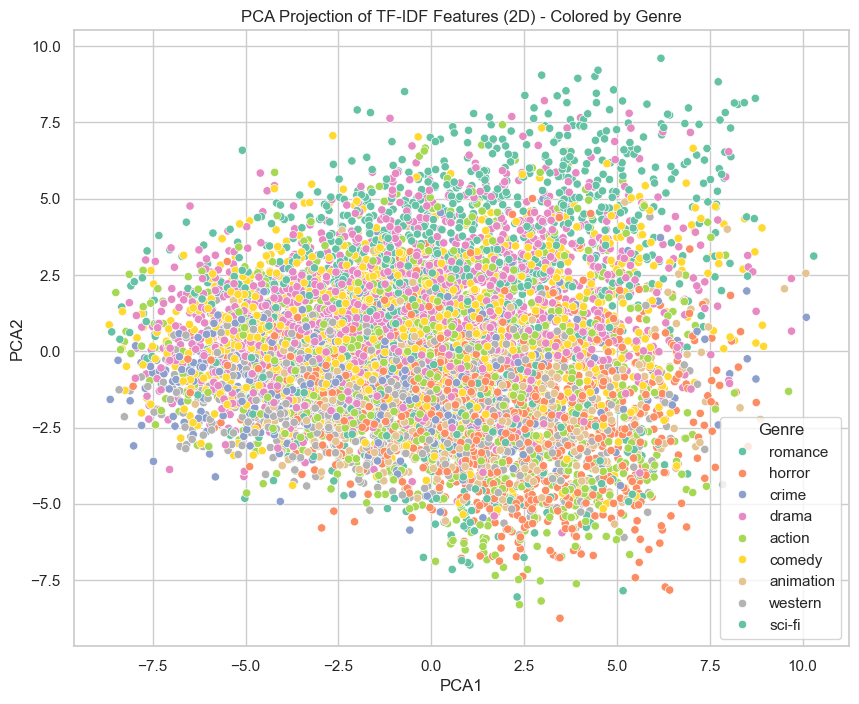

In [13]:
pca_description_df, pca_description = plot_pca_tfidf(df, "description", "genre")

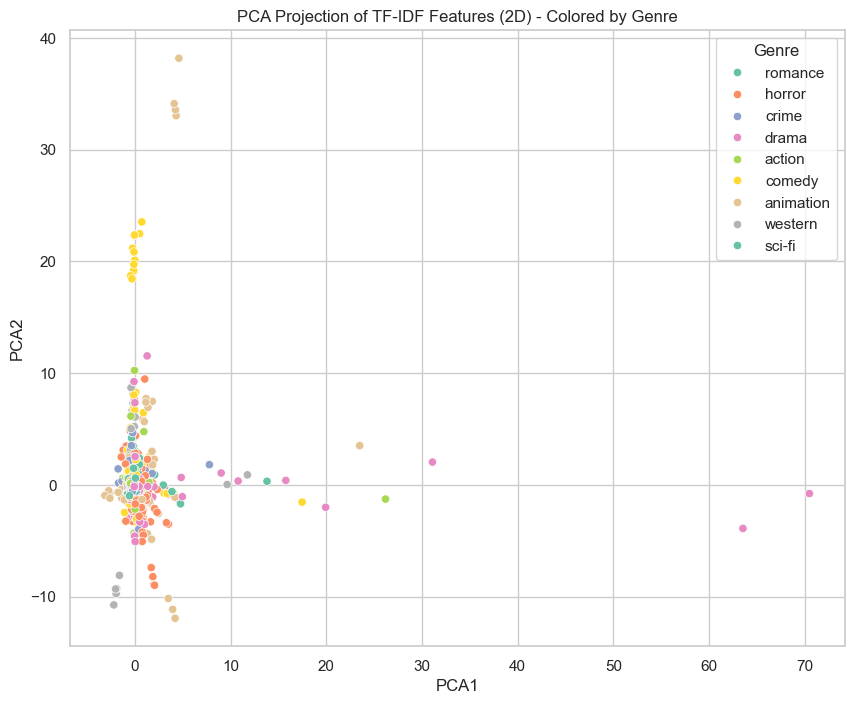

In [14]:
pca_title_df, pca_title = plot_pca_tfidf(df, "title", "genre")

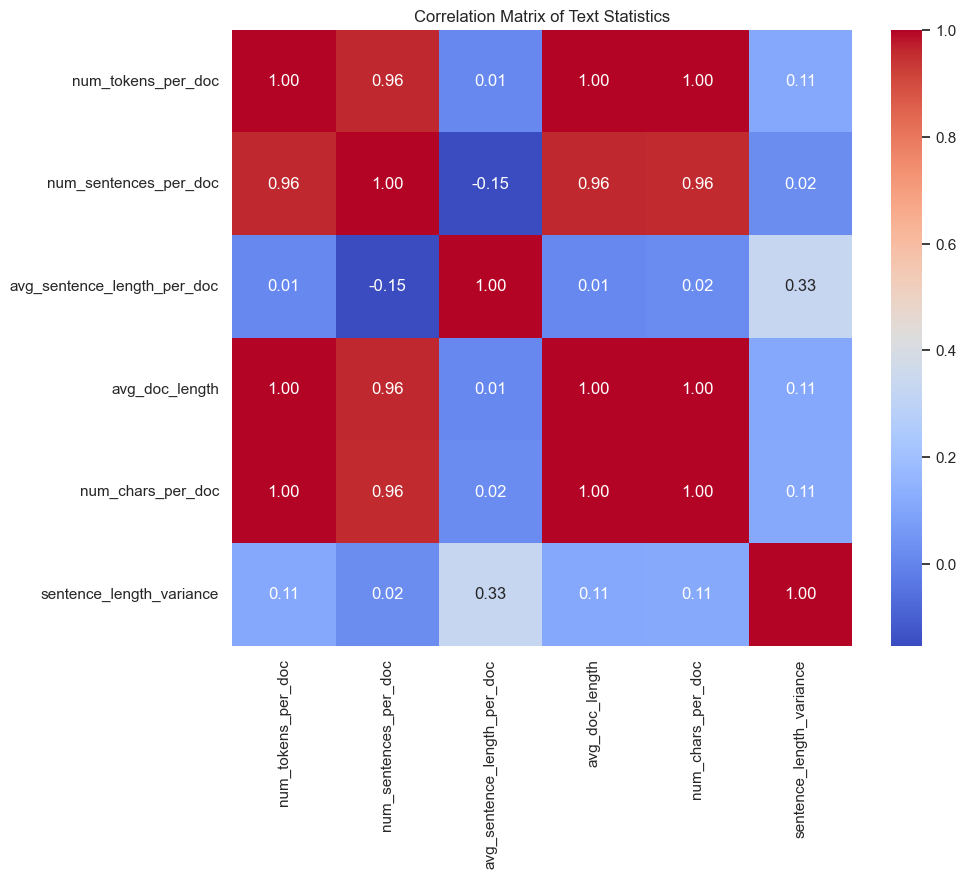

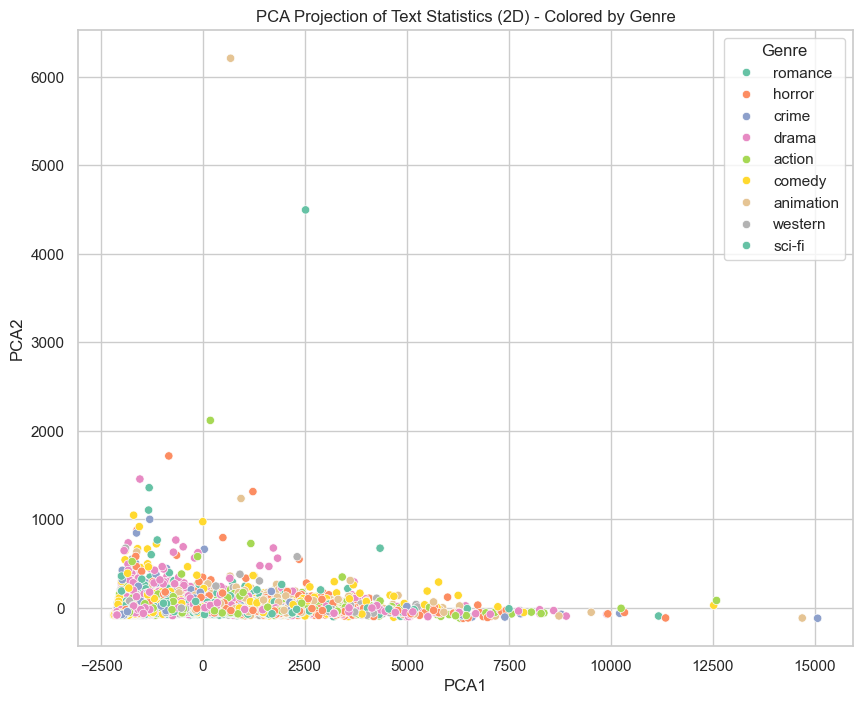

In [15]:
plot_correlation_matrix(stats)
pca_stats_df, pca_stats = plot_pca(stats, df["genre"])

### Generate Train and Test Set

In [25]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)

In [26]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

### Generate Embeddings

In [17]:
import pandas as pd
from src.embedding import process_and_save_in_chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter
from sentence_transformers import SentenceTransformer

# Example of how embeddings were generated, in practice we ran the embedding.py file
model = SentenceTransformer("avsolatorio/GIST-small-Embedding-v0")
text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=50)
output_path = "data/processed/processed_embeddings_train.csv"
process_and_save_in_chunks(train_df, "description", model, chunk_size=300, output_path=output_path)

c:\Users\vasco\repos\Natural-Language\venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


7220

In [27]:
embedding_train_path = "data/processed/processed_embeddings_train.csv"
embedding_train_df = pd.read_csv(embedding_train_path)

embedding_train_df = pd.concat([train_df["genre"], embedding_train_df], axis=1)
embedding_train_df.drop_duplicates(inplace=True)
embedding_train_df.reset_index(drop=True, inplace=True)
embedding_train_df.head(3)

,genre,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_375,embedding_376,embedding_377,embedding_378,embedding_379,embedding_380,embedding_381,embedding_382,embedding_383,embedding_384
0,comedy,-0.012284,-0.021904,-0.006337,-0.051914,-0.006249,0.040353,0.106852,-0.002247,0.037778,...,0.016609,-0.026133,0.038019,0.005874,-0.014756,0.014581,-0.031106,0.008646,0.057929,0.005714
1,horror,-0.041947,0.028383,0.013460,0.035603,0.017944,-0.003415,0.097785,-0.001833,-0.011367,...,0.011761,-0.013045,-0.028212,0.025562,-0.008179,0.002390,0.024377,0.026454,-0.021387,-0.017826
2,romance,-0.050108,0.051763,-0.020621,-0.056379,0.041759,0.016815,0.130277,-0.010616,-0.030961,...,-0.002412,-0.048511,-0.025912,-0.012811,-0.034194,-0.018928,0.006511,0.039823,0.003626,0.018368


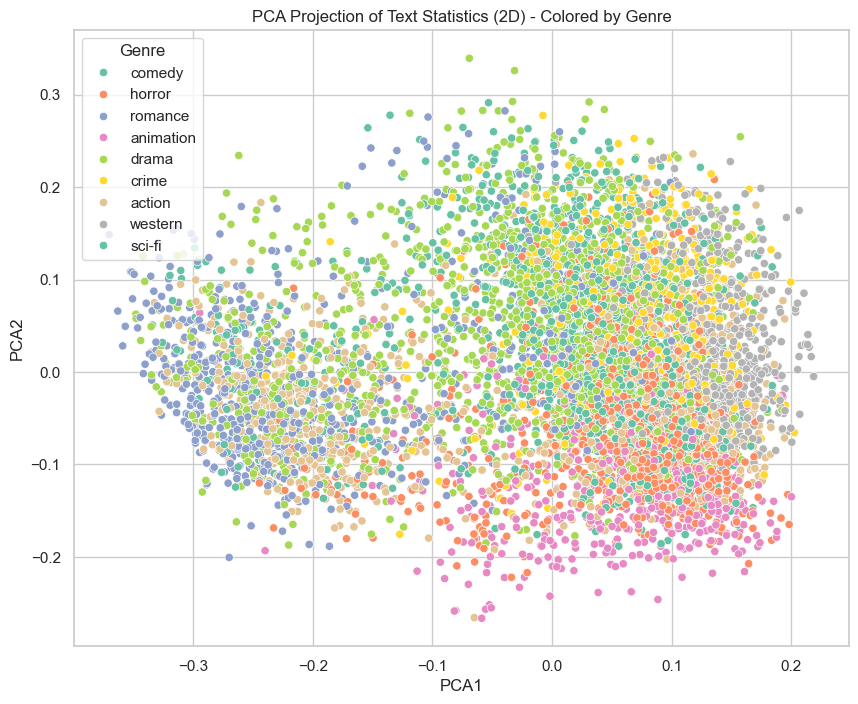

In [28]:
embeddings_aux = embedding_train_df.drop("genre", inplace=False, axis=1)
pca_embedding_df, pca_embedding = plot_pca(embeddings_aux, embedding_train_df["genre"])

In [29]:
embedding_test_path = "data/processed/processed_embeddings_test.csv"
embedding_test_df = pd.read_csv(embedding_test_path)

embedding_test_df = pd.concat([test_df["genre"], embedding_test_df], axis=1)
embedding_test_df.reset_index(drop=True, inplace=True)
embedding_test_df.head(3)

,genre,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_375,embedding_376,embedding_377,embedding_378,embedding_379,embedding_380,embedding_381,embedding_382,embedding_383,embedding_384
0,drama,-0.077572,-0.015927,0.012377,-0.072578,0.069122,-0.013593,0.110219,-0.020555,-0.028536,...,0.008910,0.024179,0.022270,0.036184,0.016108,-0.035023,-0.030181,0.021214,0.038490,0.028999
1,animation,-0.036794,-0.016572,0.016905,-0.000142,0.072834,0.019995,0.074192,0.006307,-0.013418,...,0.012058,-0.062853,-0.021610,-0.026276,0.000287,-0.007654,-0.018449,0.009981,0.023881,0.015989
2,crime,-0.022171,0.049553,-0.021282,-0.039448,0.010386,0.023542,0.106660,-0.038569,0.004226,...,0.018915,-0.055932,-0.012698,-0.033505,-0.010777,-0.003551,-0.030710,0.031509,0.047399,0.047492


### Duplicate Candidates


In [30]:
%autoreload 2

from src.dataset import filter_duplicate_descriptions, find_similar_descriptions, print_differences

In [31]:
filter_duplicate_descriptions(train_df, "description", "title").head(6)

,title,from,genre,director,description
1658,The Protector,Hong Kong,action,James Glickenhaus,"As noted above, Jackie Chan re-edited The Prot..."
3681,"Protector, The",American,action,James Glickenhaus,"As noted above, Jackie Chan re-edited The Prot..."
6536,Terror Street,American,crime,Montgomery Tully,"Bill Rogers (Dan Duryea), an American jet pilo..."
4487,36 Hours,British,crime,Montgomery Tully,"Bill Rogers (Dan Duryea), an American jet pilo..."
637,"Harry Tracy, Desperado",Canadian,western,William Graham,"By the end of the 19th century, Butch Cassidy,..."
4676,Harry Tracy,American,western,William A. Graham,"By the end of the 19th century, Butch Cassidy,..."


In [32]:
similar_pairs = find_similar_descriptions(train_df, "description")

In [33]:
print_differences(train_df, similar_pairs, "title")
print("\n")
print_differences(train_df, similar_pairs, "director")
print("\n")
print_differences(df, similar_pairs, "genre")
print("\n")
print_differences(df, similar_pairs, "from")


 Different Title: 

Vettaikkaran (456) and Puli Veta (5277) : (Cosine 1.0000, Jaccard 1.0000)
Agnee (533) and Agni (2061) : (Cosine 1.0000, Jaccard 1.0000)
Harry Tracy, Desperado (637) and Harry Tracy (4676) : (Cosine 1.0000, Jaccard 1.0000)
Vambu Sandai (938) and Lakshmi Putrudu (1541) : (Cosine 0.9786, Jaccard 0.9655)
Abhimanyu (996) and Jaihind 2 (3041) : (Cosine 1.0000, Jaccard 1.0000)
Abhimanyu (996) and Jai Hind 2 (3178) : (Cosine 1.0000, Jaccard 1.0000)
Nayaki (1097) and Nayagi (4000) : (Cosine 1.0000, Jaccard 1.0000)
Slam Dunk: Shohoku's Greatest Challenge! (1590) and Slam Dunk: Howling Basketman Spirit!! (1802) : (Cosine 1.0000, Jaccard 1.0000)
Toshokan Sensō (1650) and Library War: The Wings of Revolution (2403) : (Cosine 1.0000, Jaccard 1.0000)
The Protector (1658) and Protector, The (3681) : (Cosine 1.0000, Jaccard 1.0000)
Norte, the End of History *(2014 commercial release) (wide release) (1734) and Norte, the End of History *(2014 commercial release) (limited release) (6

# Preprocessing


In [28]:
%autoreload 2

from src.preprocessing import preprocess_sentence

# Expand contractions, extract noun-phrases, tokenize and lemmatize (optionally remove stopwords)
train_df["title"] = train_df["title"].apply(preprocess_sentence)
train_df["description"] = train_df["description"].apply(preprocess_sentence)

test_df["title"] = test_df["title"].apply(preprocess_sentence)
test_df["description"] = test_df["description"].apply(preprocess_sentence)

### Feature Engineering

In [25]:
%autoreload 2

from src.features import REGION_MAP, select_tokens

In [7]:
train_df["region"] = train_df["from"].map(REGION_MAP)

# Feature Selection


In [19]:
%autoreload 2
from src.logratioanalysis import LogRatioAnalysis, plot_scree_subplots_for_genres

In [ ]:
logratio_title = LogRatioAnalysis(train_df, "title", "genre")
logratio_description = LogRatioAnalysis(train_df, "description", "genre")

In [ ]:
plot_scree_subplots_for_genres(logratio_title)

In [ ]:
plot_scree_subplots_for_genres(logratio_description)

In [22]:
description_tokens = logratio_description.feature_selection(25000)
title_tokens = logratio_title.feature_selection(1000)

In [23]:
train_df["selected_description"] = train_df["description"].apply(select_tokens, selected_tokens=description_tokens)
test_df["selected_description"] = test_df["description"].apply(select_tokens, selected_tokens=description_tokens)

# Modelling


In [22]:
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import ColumnSelector
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from skrub import SelectCols, SimilarityEncoder
from category_encoders import CountEncoder
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(train_df["genre"])
train_df["genre"] = label_encoder.transform(train_df["genre"])
train_df["director"] = train_df["director"].fillna("Unknown")

X_train = train_df.drop("genre", axis=1)
y_train = train_df["genre"]

In [ ]:
test_df["genre"] = label_encoder.transform(test_df["genre"])
test_df["director"] = test_df["director"].fillna("Unknown")

X_test = test_df.drop("genre", axis=1)
y_test = test_df["genre"]

### Scenario 1: HistGradientBoostingClassifier w/ SVD

In [ ]:
text_pipeline_1 = make_union(
    make_pipeline(
        ColumnSelector("title", drop_axis=True),
        TfidfVectorizer(),
        TruncatedSVD(),
    ),
    make_pipeline(
        ColumnSelector("description", drop_axis=True),
        TfidfVectorizer(),
        TruncatedSVD(),
    ),
    make_pipeline(SelectCols("region"), SimilarityEncoder()),
    make_pipeline(SelectCols("from"), OneHotEncoder(sparse_output=False)),
    make_pipeline(ColumnSelector("director", drop_axis=True), CountEncoder()),
)

pipeline_1 = make_pipeline(text_pipeline_1, HistGradientBoostingClassifier())
pipeline_1

In [ ]:
param_distributions = {
    "histgradientboostingclassifier__learning_rate": np.logspace(-3, 0, 100),
    "histgradientboostingclassifier__max_iter": np.arange(100, 500, 50),
    "histgradientboostingclassifier__max_depth": np.arange(3, 15),
    "histgradientboostingclassifier__min_samples_leaf": np.arange(1, 51, 5),
    "histgradientboostingclassifier__max_leaf_nodes": np.arange(10, 301, 10),
    "histgradientboostingclassifier__l2_regularization": np.logspace(-4, 0, 100),
    "histgradientboostingclassifier__scoring": ["accuracy"],
    "featureunion__pipeline-1__truncatedsvd__n_components": np.arange(200, 400, 50),
    "featureunion__pipeline-2__truncatedsvd__n_components": np.arange(2000, 6000, 500),
    "featureunion__pipeline-5__truncatedsvd__n_components": np.arange(200, 400, 50),
}

In [ ]:
random_search_1 = RandomizedSearchCV(
    pipeline_1,
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    scoring="accuracy",
    random_state=42,
    verbose=4,
    error_score="raise",
)
random_search_1.fit(X_train, y_train)

In [ ]:
best_params = random_search_1.best_params_
best_score = random_search_1.best_score_
best_model = random_search_1.best_estimator_

print("\n Best Parameters:", best_params)
print("\n Best Score:", best_score)

In [ ]:
# TODO: use best metrics to predict on test set
pipeline_1.set_params(**best_params)
pipeline_1.fit(X_train, y_train)
y_pred = pipeline_1.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
confusion_matrix(y_test, y_pred)

### Scenario 2: SVM w/o feature selection

In [ ]:
text_pipeline_2 = make_union(
    make_pipeline(
        ColumnSelector("title", drop_axis=True),
        TfidfVectorizer(),
    ),
    make_pipeline(
        ColumnSelector("description", drop_axis=True),
        TfidfVectorizer(),
    ),
    make_pipeline(SelectCols("region"), SimilarityEncoder()),
    make_pipeline(SelectCols("from"), OneHotEncoder(sparse_output=False)),
    make_pipeline(ColumnSelector("director", drop_axis=True), CountEncoder()),
)

pipeline_2 = make_pipeline(text_pipeline_2, SVC())
pipeline_2

In [ ]:
param_distributions = {
    "svc__C": np.logspace(-3, 3, 100),
    "svc__kernel": ["poly", "sigmoid", "rbf", "linear"],
    "svc__gamma": ["scale", "auto"] + list(np.logspace(-4, 1, 100)),
    "svc__degree": np.arange(2, 6),
    "svc__coef0": np.linspace(-1, 1, 100),
    "svc__class_weight": ["balanced", None],
}

In [ ]:
random_search_2 = RandomizedSearchCV(
    pipeline_2,
    param_distributions=param_distributions,
    n_iter=50,
    cv=4,
    scoring="accuracy",
    random_state=42,
    verbose=4,
    error_score="raise",
)
random_search_2.fit(X_train, y_train)

In [ ]:
best_params = random_search_2.best_params_
best_score = random_search_2.best_score_
best_model = random_search_2.best_estimator_

print("\nBest Parameters:", best_params)
print("\nBest Score:", best_score)

Best Parameters: {
    
    'svc__C': np.float64(3.9676050770529883), 

    'svc__coef0': np.float64(0.3991305878561679), 
    
    'svc__degree': 4, 'svc__gamma': 'auto',
    
    'svc__kernel': 'linear'}

Best Score: 0.6512520009226962

In [ ]:
# TODO: use best metrics to predict on test set
pipeline_2.set_params(**best_params)
pipeline_2.fit(X_train, y_train)
y_pred = pipeline_2.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
confusion_matrix(y_test, y_pred)

### Scenario 3: SVM w/ Feature Selection

In [ ]:
text_pipeline_3 = make_union(
    make_pipeline(
        ColumnSelector("title", drop_axis=True),
        TfidfVectorizer(ngram_range=(2, 4)),
    ),
    make_pipeline(
        ColumnSelector("selected_description", drop_axis=True),
        TfidfVectorizer(),
    ),
    make_pipeline(SelectCols("region"), SimilarityEncoder()),
    make_pipeline(SelectCols("from"), OneHotEncoder(sparse_output=False)),
    make_pipeline(ColumnSelector("director", drop_axis=True), CountEncoder()),
)

pipeline_3 = make_pipeline(text_pipeline_3, SVC())
pipeline_3

In [ ]:
random_search_3 = RandomizedSearchCV(
    pipeline_3,
    param_distributions=param_distributions,
    n_iter=50,
    cv=4,
    scoring="accuracy",
    random_state=42,
    verbose=4,
    error_score="raise",
)
random_search_3.fit(X_train, y_train)

In [ ]:
best_params = random_search_3.best_params_
best_score = random_search_3.best_score_
best_model = random_search_3.best_estimator_

print("\nBest Parameters:", best_params)
print("\nBest Score:", best_score)

Best Parameters: {
    
    'svc__C': np.float64(3.9676050770529883), 

    'svc__coef0': np.float6(03991305878561679), 

    'svc__degree': 4, 

    'svc__gamma': 'auto', 

    'svc__kernel': 'linear'}

Best Score: 0.6364193794168839

In [ ]:
# TODO: use best metrics to predict on test set
pipeline_3.set_params(**best_params)
pipeline_3.fit(X_train, y_train)
y_pred = pipeline_3.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
confusion_matrix(y_test, y_pred)

### Modelling with Embeddings

In [ ]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(train_df["genre"])
embedding_train_df["genre"] = label_encoder.transform(["genre"])

X_train = embedding_train_df.drop("genre", axis=1)
y_train = embedding_train_df["genre"]

In [ ]:
embedding_test_df["genre"] = label_encoder.transform(["genre"])

X_test = embedding_test_df.drop("genre", axis=1)
y_test = embedding_test_df["genre"]

### Scenario 4: SVM w/ Embeddings  

In [23]:
param_distributions = {
    "C": np.logspace(-3, 3, 100),
    "kernel": ["poly", "sigmoid"],
    "gamma": ["scale", "auto"] + list(np.logspace(-4, 1, 100)),
    "degree": np.arange(2, 6),
    "coef0": np.linspace(-1, 1, 100),
    "class_weight": ["balanced", None],
}

In [ ]:
random_search_4 = RandomizedSearchCV(
    SVC(),
    param_distributions=param_distributions,
    n_iter=10,
    scoring="accuracy",
    cv=4,
    verbose=4,
    random_state=42,
    n_jobs=-1,
)

random_search_4.fit(X_train, y_train)

In [ ]:
best_params = random_search_4.best_params_
best_score = random_search_4.best_score_
best_model = random_search_4.best_estimator_

print("\nBest Parameters:", best_params)
print("\nBest Score:", best_score)

Best parameters found: {
    
    'kernel': 'poly', 
    
    'gamma': 0.013219411484660288, 
    
    'degree': 3, 
    
    'coef0': -0.6767676767676767, 
    
    'class_weight': None, 
    
    'C': 70.54802310718645}
    
Best score found: 0.6816523633145108

In [ ]:
# TODO: use best metrics to predict on test set
svc = SVC()
svc.set_params(**best_params)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
confusion_matrix(y_test, y_pred)

### Scenario 5: HistGradientBoosting w/ Embeddings

In [ ]:
param_distributions = {
    "learning_rate": np.logspace(-3, 0, 100),
    "max_iter": np.arange(100, 500, 50),
    "max_depth": np.arange(3, 15),
    "min_samples_leaf": np.arange(1, 51, 5),
    "max_leaf_nodes": np.arange(10, 301, 10),
    "l2_regularization": np.logspace(-4, 0, 100),
    "scoring": ["accuracy"],
}

In [ ]:
random_search_5 = RandomizedSearchCV(
    HistGradientBoostingClassifier(),
    param_distributions=param_distributions,
    n_iter=50,
    scoring="accuracy",
    cv=4,
    verbose=4,
    random_state=42,
    n_jobs=-1,
)

random_search_5.fit(X_train, y_train)

In [ ]:
best_params = random_search_5.best_params_
best_score = random_search_5.best_score_
best_model = random_search_5.best_estimator_

print("\nBest Parameters:", best_params)
print("\nBest Score:", best_score)

Best parameters found: {
    
    'scoring': 'accuracy', 

    'min_samples_leaf': 6, 

    'max_leaf_nodes': 50, 

    'max_iter': 350, 

    'max_depth': 6, 

    'learning_rate': 0.1, 

    'l2_regularization': 0.0004430621457583882, 
    }
Best score found: 0.671883263271661

In [ ]:
# TODO: use best metrics to predict on test set
hgb = HistGradientBoostingClassifier()
hgb.set_params(**best_params)
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred, target_names=label_encoder.classes_)

In [ ]:
confusion_matrix(y_test, y_pred)

# Predict Test Set

In [ ]:
path_test = "data/raw/test_no_labels.txt"
columns_test = ["title", "from", "director", "description"]

df_no_labels_test = read_data(path_test, columns_test)
df_no_labels_test.head(3)

In [ ]:
path_train = "data/raw/train.txt"
columns = ["title", "from", "genre", "director", "description"]

df = read_data(path, columns)
df.head(3)

In [ ]:
train_description = df["description"].dropna().unique()
test_description = df_no_labels_test["description"].dropna().unique()

overlapping_descriptions = set(train_description).intersection(set(test_description))
print(f"{len(overlapping_descriptions)} overlapping descriptions found.")

In [ ]:
rule_based_dict = df[df["description"].isin(overlapping_descriptions)].set_index("description")["genre"].to_dict()


def rule_based_prediction(description):
    if description in rule_based_dict:
        return rule_based_dict[description]
    return None


df_no_labels_test["rule_based_prediction"] = df_no_labels_test["description"].apply(rule_based_prediction)

df_no_labels_test[df_no_labels_test["description"].isin(overlapping_descriptions)].head(15)

In [ ]:
output_path = "data/processed/processed_embeddings_no_labels_test.csv"
process_and_save_in_chunks(df_no_labels_test, "description", model, chunk_size=300, output_path=output_path)